In [1]:
from loica import *
import matplotlib.pyplot as plt

In [23]:
osc = GeneticNetwork()

acts = [Regulator(name=f'Act{i}', degradation_rate=0.75) for i in range(3)]
osc.add_regulators(acts)

rep = Regulator(name='Rep', degradation_rate=0.75)
osc.add_regulator(rep)

reporters = [Reporter(name=f'SFP{i}', color='blue', degradation_rate=0.75) for i in range(3)]
osc.add_reporters(reporters)

op1 = Hill2([rep,acts[0]], [acts[0],acts[1],reporters[0]], alpha=[1,0,100,0], K=[10,10], n=[2,2])
op2 = Hill1(acts[1], [acts[2], reporters[1]], alpha=[1,100], K=10, n=2)
op3 = Hill1(acts[2], [rep, reporters[2]], alpha=[1,100], K=10, n=2)
osc.add_operators([op1,op2,op3])

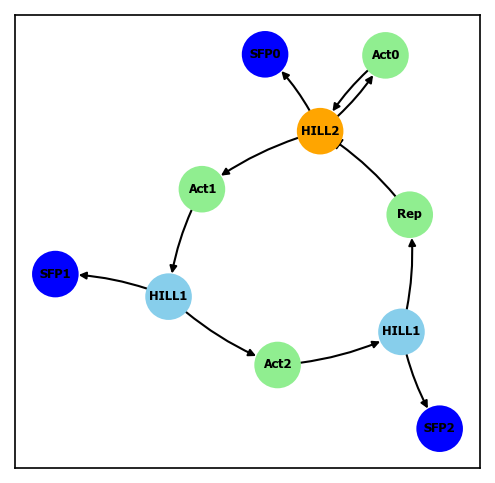

In [24]:
plt.figure(figsize=(4,4), dpi=150)
osc.draw(contracted=False, arrowsize=7, node_size=500, linewidths=0, alpha=1)

In [25]:
def growth_rate(t):
    return gompertz_growth_rate(t, 0.01, 1, 1, 0.5)

def biomass(t):
    return gompertz(t, 0.01, 1, 1, 0.5)

metab = SimulatedMetabolism(biomass, growth_rate)

In [26]:
acts[0].init_concentration = 100

In [27]:
sample = Sample(genetic_network=osc, 
                    metabolism=metab)

In [28]:
sample.initialize()
rep1 = []
rep2 = []
rep3 = []
for t in range(5000):
    sample.step(0, 1e-2, stochastic=True)
    reporters = sample.reporters
    rep1.append(reporters[0].concentration)
    rep2.append(reporters[1].concentration)
    rep3.append(reporters[2].concentration)

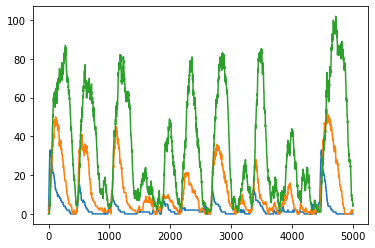

In [29]:
plt.plot(rep1)
plt.plot(rep2)
plt.plot(rep3)

In [ ]:
assay = Assay([sample], 
              n_measurements=200, 
              interval=0.24,
              name=f'Loica Tigges oscillator',
              description='Simulated oscillator generated by loica'
             )
assay.run()

In [ ]:
m = assay.measurements
fig,ax = plt.subplots(1,1)
for i in range(3):
    m[m.Signal==f'SFP{i}'].plot(x='Time', y='Measurement', style='-', ax=ax)
plt.legend([f'SFP{i}' for i in range(3)])

In [ ]:
col = Colony(circuit=osc, r0=10)

In [ ]:
kymo = col.map_kymo(col.kymograph(500, 0, 24))

In [ ]:
kymo.shape

In [ ]:
plt.imshow(kymo)